# Task

Train a deep MLP on the MNIST dataset and see if you can get over 98% preci‐
sion. Try adding all the bells and whistles (i.e., save checkpoints, use early stop‐
ping, plot learning curves using TensorBoard, and so on).

# Solution

In [1]:
%run ../convention.ipynb
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Flatten, Dense


C:\Users\dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\dell\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 fro

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

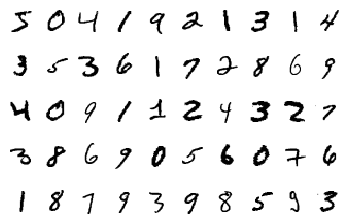

In [5]:
fig, axes = plt.subplots(5, 10, subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap = 'binary')

In [8]:
X_train, X_valid = X_train[5000:] / 250.0, X_train[:5000] / 250.0
X_test = X_test / 250.0
y_train, y_valid = y_train[5000:], y_train[:5000]

In [12]:
model = Sequential([
    Flatten(),
    Dense(30, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])

In [13]:
checkpoint_cb = ModelCheckpoint('mnist_model.h5', save_best_only=True)
early_cb = EarlyStopping(patience=10, restore_best_weights=True)

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 30, batch_size=32, callbacks = [checkpoint_cb, early_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 34us/step - loss: 0.0659 - accuracy: 0.9790 - val_loss: 0.1137 - val_accuracy: 0.9668
Epoch 2/30
55000/55000 [==============================] - 2s 33us/step - loss: 0.0609 - accuracy: 0.9806 - val_loss: 0.1091 - val_accuracy: 0.9668
Epoch 3/30
55000/55000 [==============================] - 2s 32us/step - loss: 0.0577 - accuracy: 0.9821 - val_loss: 0.1124 - val_accuracy: 0.9670
Epoch 4/30
55000/55000 [==============================] - 2s 32us/step - loss: 0.0542 - accuracy: 0.9829 - val_loss: 0.1162 - val_accuracy: 0.9682
Epoch 5/30
55000/55000 [==============================] - 2s 34us/step - loss: 0.0511 - accuracy: 0.9842 - val_loss: 0.1179 - val_accuracy: 0.9652
Epoch 6/30
55000/55000 [==============================] - 2s 30us/step - loss: 0.0482 - accuracy: 0.9848 - val_loss: 0.1141 - val_accuracy: 0.9686
Epoch 7/30
55000/55000 [==============================] - 2s 30us/ste

In [16]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [17]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': None,
 'samples': 55000,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

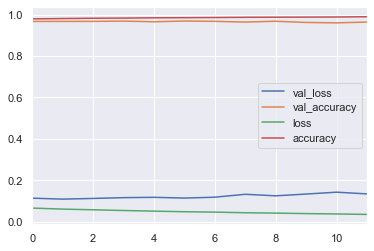

In [18]:
df = pd.DataFrame(history.history)
df.plot()

In [20]:
from keras.models import load_model
mnist_model = load_model('mnist_model.h5')

In [21]:
mnist_model.layers

In [22]:
mnist_model.layers[1].get_weights()

[array([[-0.08440884,  0.07014262, -0.01045637, ...,  0.08534392,
          0.04652511, -0.04714442],
        [-0.0024033 ,  0.03325324, -0.03906415, ..., -0.06881197,
          0.00212369,  0.00051396],
        [-0.03177783, -0.03767528,  0.02110788, ...,  0.04458667,
          0.05003235,  0.0421276 ],
        ...,
        [-0.0404723 ,  0.02810637,  0.05456782, ...,  0.06414621,
          0.07433965, -0.07736856],
        [-0.06638271, -0.01504757,  0.0051682 , ...,  0.06808173,
         -0.05754605,  0.08084542],
        [-0.03996777, -0.01752483,  0.01283856, ..., -0.06666005,
         -0.07571763,  0.00224891]], dtype=float32),
 array([-0.13380018, -0.3811984 ,  0.4521637 ,  0.35479972, -0.12971942,
         0.16439496,  0.12454324, -0.36845243,  0.03817122, -0.03548589,
         0.33083633, -0.20814724,  0.08810564,  0.03080784, -0.0091825 ,
        -0.05636124, -0.07670647,  0.26880154,  0.00569468, -0.12948972,
         0.25378054, -0.10092013,  0.2832535 ,  0.12790908, -0.039